<a href="https://colab.research.google.com/github/ElliotRoosevelt/kmc/blob/main/assignment_kmc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment: $k$ Means Clustering

## **Do two questions.**

`! git clone https://www.github.com/DS3001/kmc`

In [1]:
! git clone https://www.github.com/DS3001/kmc

Cloning into 'kmc'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 25 (delta 4), reused 3 (delta 3), pack-reused 18
Receiving objects: 100% (25/25), 5.04 MiB | 25.57 MiB/s, done.
Resolving deltas: 100% (4/4), done.


**Q1.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

In [3]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/kmc/data/airbnb_hw.csv')

In [30]:
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [66]:
#1 clean price, beds, number of reviews, and review socres rating
air = df.loc[:,['Price','Beds','Number Of Reviews','Review Scores Rating']]

In [67]:
#commas in price cleaned
air['Price'].value_counts()
air['Price'] = air['Price'].str.replace(',','')
air['Price'] = pd.to_numeric(air['Price'],errors='coerce')
air['Price'].value_counts()

150     1481
100     1207
200     1059
125      889
75       873
        ... 
840        1
306        1
2695       1
2520       1
291        1
Name: Price, Length: 511, dtype: int64

In [68]:
# clean beds fill na collumns 1
air['Beds'] = air['Beds'].fillna(1)

In [27]:
air.head(10)

,Price,Beds,Number Of Reviews,Review Scores Rating
0,145,1.0,0,NaN
1,37,1.0,1,NaN
2,28,1.0,1,NaN
3,199,3.0,0,NaN
4,549,3.0,39,96.0
5,149,1.0,4,100.0
6,250,1.0,9,100.0
7,90,1.0,80,94.0
8,270,2.0,95,90.0
9,290,2.0,23,96.0


In [32]:
air['Number Of Reviews'].value_counts()

0      7814
1      3572
2      2457
3      1764
4      1382
       ... 
216       1
191       1
213       1
178       1
130       1
Name: Number Of Reviews, Length: 205, dtype: int64

In [54]:
#review scores rating
air['Review Scores Rating'].value_counts()
pd.crosstab(df['Review Scores Rating'].isnull(), df['Number Of Reviews']>0)
#dropping all missing values because do not want to skew clustering to center.

Number Of Reviews,False,True
Review Scores Rating,,
False,0,22155
True,7814,509


In [83]:
#dropping missing
air=air.dropna()
air.describe()

,Price,Beds,Number Of Reviews,Review Scores Rating
count,22155.000000,22155.000000,22155.000000,22155.000000
mean,154.787633,1.556985,16.505439,91.993230
std,148.836621,1.043273,24.308241,8.850373
min,10.000000,0.000000,1.000000,20.000000
25%,85.000000,1.000000,2.000000,89.000000
50%,125.000000,1.000000,7.000000,94.000000
75%,190.000000,2.000000,20.000000,100.000000
max,10000.000000,16.000000,257.000000,100.000000


In [90]:
#2 maxmin normalize data remove nan
def maxmin(x):
    u=(x-min(x))/(max(x)-min(x))
    return u

In [91]:
Z=air.drop('Price',axis=1)
Z=Z.apply(maxmin)

In [92]:
Z

,Beds,Number Of Reviews,Review Scores Rating
4,0.1875,0.148438,0.950
5,0.0625,0.011719,1.000
6,0.0625,0.031250,1.000
7,0.0625,0.308594,0.925
8,0.1250,0.367188,0.875
...,...,...,...
30332,0.0625,0.000000,1.000
30347,0.0625,0.000000,0.750
30378,0.0625,0.000000,1.000
30404,0.0625,0.000000,1.000


In [93]:
# cluster data y beds, n of r, r s r for k=6
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [95]:
model=KMeans(n_clusters=6, max_iter=300, n_init = 10, random_state=0)
model=model.fit(Z)
Z['cluster'] = model.labels_

In [96]:
air.describe()

,Price,Beds,Number Of Reviews,Review Scores Rating
count,22155.000000,22155.000000,22155.000000,22155.000000
mean,154.787633,1.556985,16.505439,91.993230
std,148.836621,1.043273,24.308241,8.850373
min,10.000000,0.000000,1.000000,20.000000
25%,85.000000,1.000000,2.000000,89.000000
50%,125.000000,1.000000,7.000000,94.000000
75%,190.000000,2.000000,20.000000,100.000000
max,10000.000000,16.000000,257.000000,100.000000


In [60]:
#4 seaborn's .pairplot() to make grid of scatterplots that show how clustering in multiple dimensions
import seaborn as sns

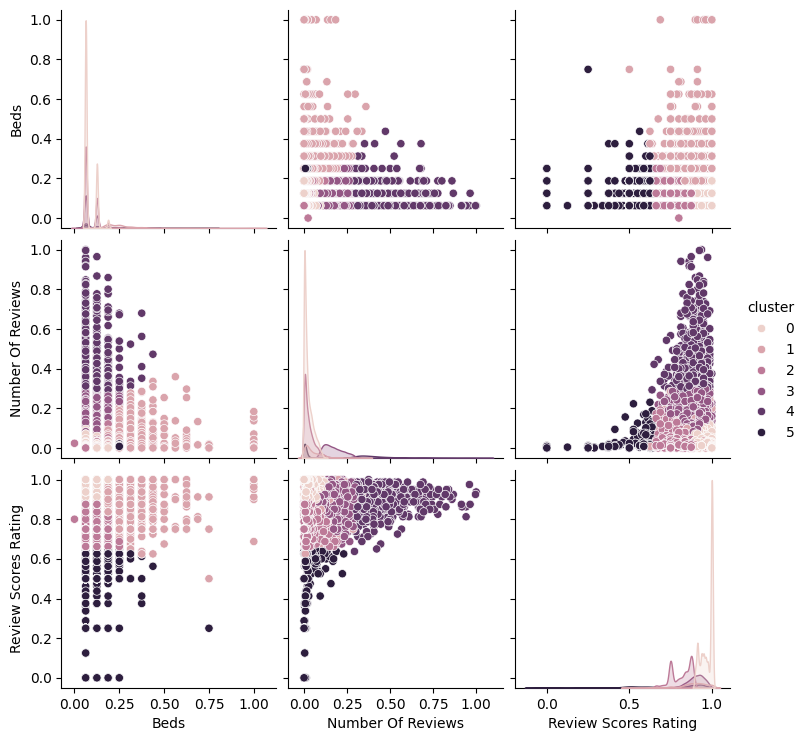

In [97]:
sns.pairplot(data=Z,hue='cluster')

In [98]:
#5 groupby and descirve to find avg price for each cluster
air['cluster']=model.labels_
air.loc[:,['Price','cluster'] ].groupby('cluster').describe()

Price                                                              
           count        mean         std   min     25%    50%     75%      max
cluster                                                                       
0        10512.0  152.233352  147.281729  10.0   85.00  130.0  190.00  10000.0
1         1633.0  293.458665  262.439199  27.0  150.00  229.0  350.00   4500.0
2         5554.0  131.496579  102.621585  20.0   75.00  110.0  169.00   5000.0
3         3030.0  141.674917   84.134011  22.0   87.25  125.0  175.00   1000.0
4          794.0  133.238035   83.077776  27.0   80.00  110.0  168.50    875.0
5          632.0  133.587025  215.505565  25.0   65.00   99.0  151.25   5000.0

Number 4 and 5 is wrong. I have tripled checked those questions starting from question 1, but I do not know why my scatterplots and average prices are so incorrect.

I am basing which clusters have the highest rental prices from your describe example for number 5.

Cluster 3 has the highest avg highest rental prices at $293.53. Cluster 0, 4, 5 have relatively about the same prices at about #131.

Text(0.5, 1.0, 'Scree Plot')

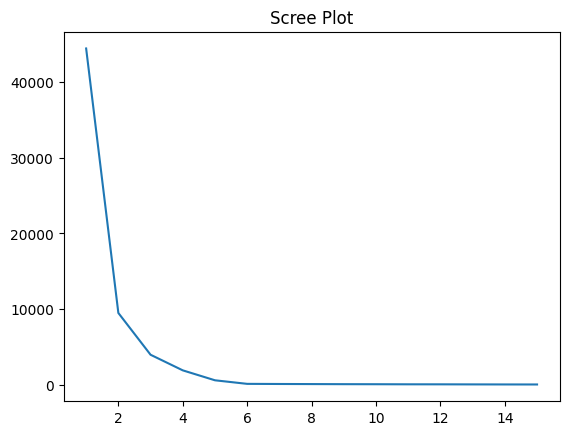

In [99]:
k_bar=15
k_grid=np.arange(1,k_bar+1)
SSE=np.zeros(k_bar)
for k in range(k_bar):
    model=KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    model=model.fit(Z)
    SSE[k]=model.inertia_

sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot')

In [103]:
model=KMeans(n_clusters=3, max_iter=300, n_init = 10, random_state=0) # Create a model for
model=model.fit(Z) # Fit the emodel
air['cluster']=model.labels_

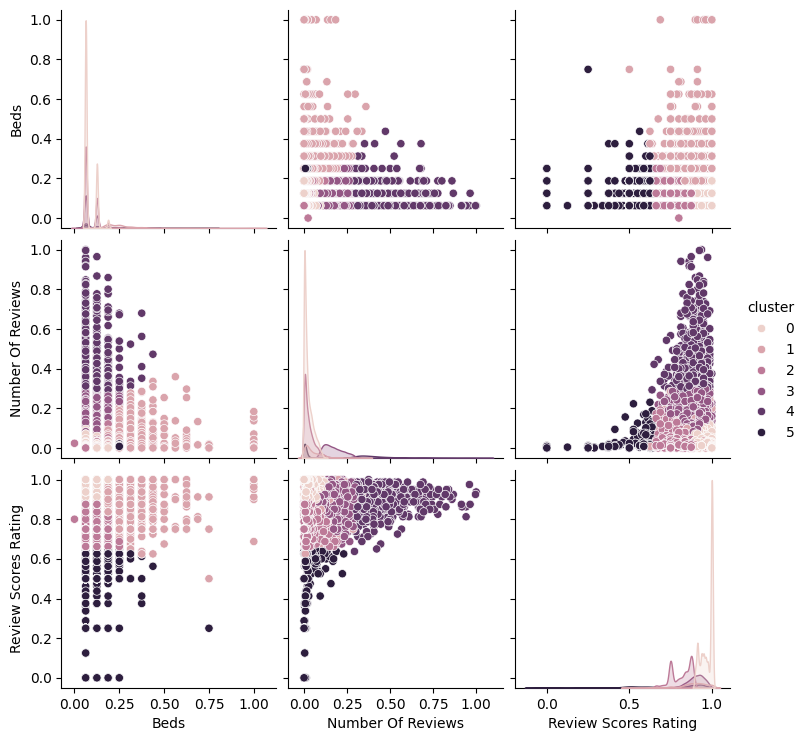

In [104]:
sns.pairplot(data=Z,hue='cluster')

In [106]:
#again wrong
air['cluster']=model.labels_
air.loc[:,['Price','cluster'] ].groupby('cluster').describe()

Price                                                           
           count        mean         std   min   25%    50%    75%      max
cluster                                                                    
0        10512.0  152.233352  147.281729  10.0  85.0  130.0  190.0  10000.0
1         4456.0  139.024461  112.402556  22.0  80.0  120.0  175.0   5000.0
2         7187.0  168.296925  168.483146  20.0  82.0  130.0  199.0   5000.0

**Q2.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [108]:
def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

In [109]:
df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

<Axes: xlabel='x1', ylabel='x2'>

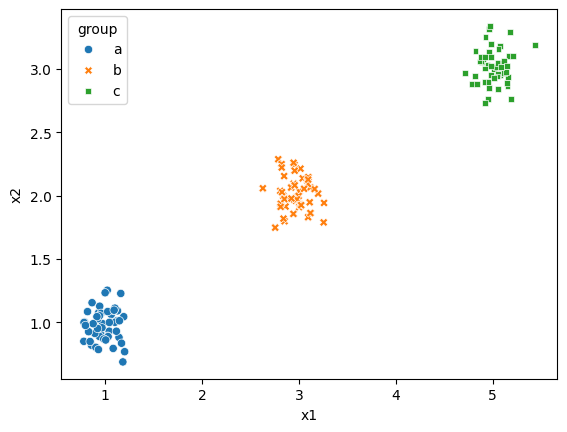

In [111]:
#make scatter plots of X1, X2 ponits by group for each dataselt,
#as noise goes up from 0.125 to 2.0 what happens to the visual distinctness of the clusters
sns.scatterplot(data = df0_125, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

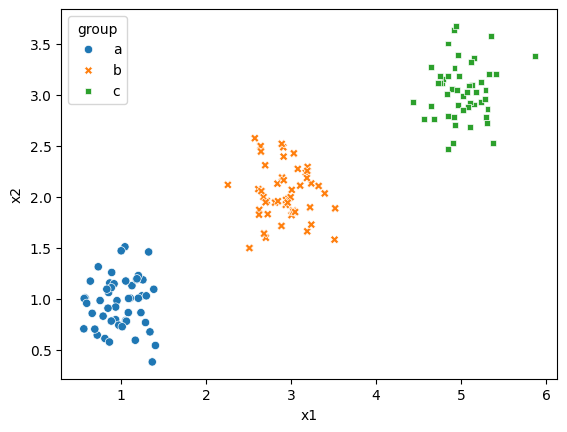

In [112]:
sns.scatterplot(data = df0_25, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

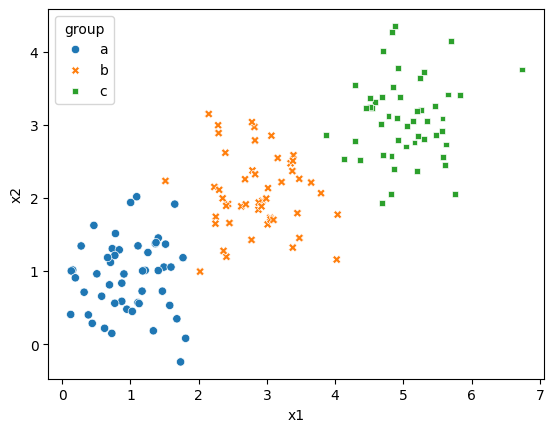

In [113]:
sns.scatterplot(data = df0_5, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

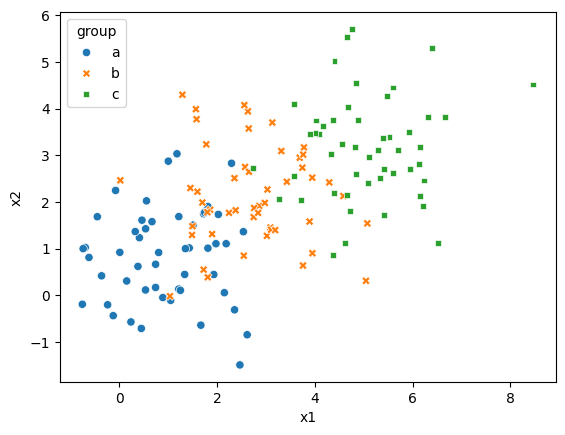

In [114]:
sns.scatterplot(data = df1_0, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

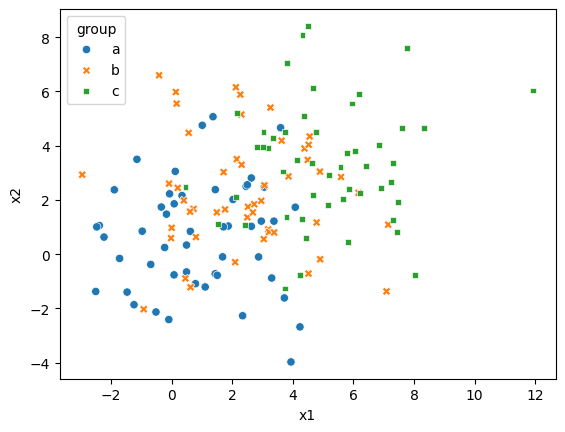

In [115]:
sns.scatterplot(data = df2_0, x = 'x1',y='x2',hue='group',style='group')

As noise goes up, the clusters are spread out and not distinct anymore.

In [131]:
#3 Describe how the level of noise affects the scree plot (particularly the presence of a clear "elbow")
#and your ability to definitively select a k

In [156]:
def maxmin(x):
    x=(x-min(x))/(max(x)-min(x))
    return x
#his way to make scree plots quicklya
#preprocess data and selest x1 and x2 to cluster
def scree(data):
    # Preprocess the data:
    X = data.loc[ : , ['x1','x2'] ] # Select data to cluster
    X = X.apply(maxmin) # Normalize the data
    #REVIEW produces error stating input x contains NaN
    k_bar = 15
    k_grid = np.arange(1,k_bar+1) # The range of k's to consider
    SSE = np.zeros(k_bar) # We'll store the training error here
    for k in range(k_bar): # For indices from 0 to k_bar-1
        model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
        model = model.fit(X) # Fit the emodel
        SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE vector
    scree_plot, axes = plt.subplots()
    sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot') # Create scree plot
    axes.set_ylim(0, 35)

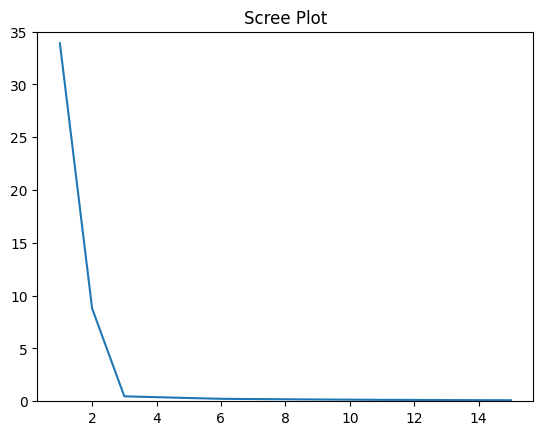

In [157]:
#elbow at k=3
scree( data = df0_125 )

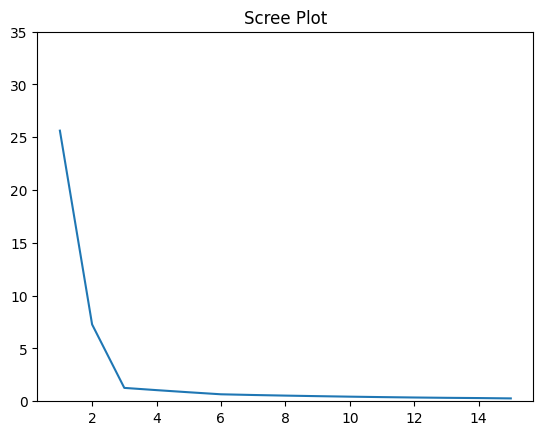

In [159]:
#elbow at k=3
scree( data = df0_25 )

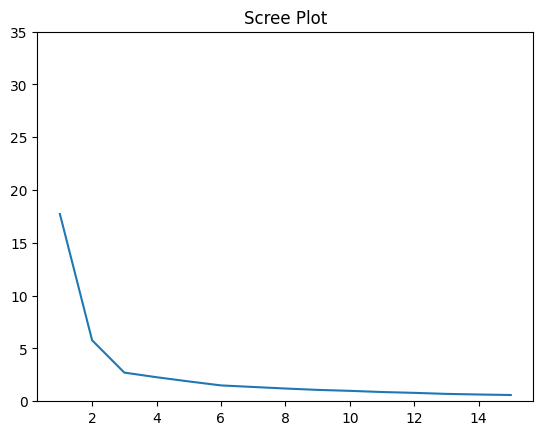

In [161]:
# elbow at k=3
scree( data = df0_5 )


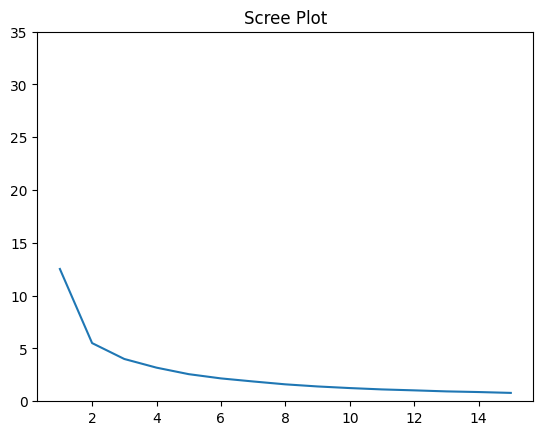

In [162]:
# do not think I can definitively say there is an elbow
scree( df1_0 )

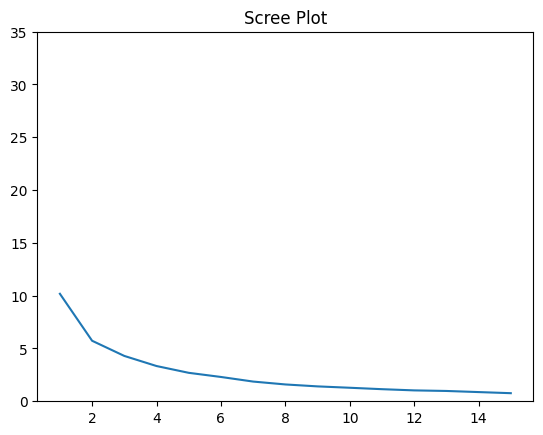

In [163]:
#no elbow
scree( df2_0 )

If noise is low, the cluster's groups are distinct and separted into its own grops, therefore you can depict a bid drip in SSE. If noise goes up, the cluster's groups are not distinct and can not clearly see ponits or the number of gropus, therefore, can not uncover hiddne heterogeniety. If the clusters are distinct like df0_125, df0_25, df0_5 then when using scree plot you can see a distinct elbow. If noise goes up like in df1_0, df2_0, the clusters are less distinct and messy. And when using scree plot, the elbows are not distinct and can not be determined.  

**Q3.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?